# Assignment 2 _Sona_C0909929

1. Importing Necessary Libraries and Dataset Loading

In [34]:
# Importing libraries
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier

In [4]:
# Step 2: Upload files
uploaded = files.upload()  # Choose your train.csv and test.csv files

Saving train.csv to train.csv


In [5]:
# Step 2: Upload files
uploaded = files.upload()  # Choose your train.csv and test.csv files

Saving test.csv to test.csv


In [6]:
# Loading the dataset
# Training dataset
train_df = pd.read_csv('train.csv')
# Testing dataset
test_df = pd.read_csv('test.csv')

In [7]:
# Displaying the first few rows of train data
train_df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [8]:
# Displaying the first few rows of test data
test_df.head()

,sl_no,gender,salary
0,123,1,236000.000000
1,199,1,288655.405405
2,138,0,225000.000000
3,137,1,288655.405405
4,76,1,288655.405405


2. Exploratory Data Analysis (EDA) and Data Preprocessing

2.1 Dataset Overview

In [9]:
# Displaying the basic information about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl_no   43 non-null     int64  
 1   gender  43 non-null     int64  
 2   salary  43 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


In [11]:
# Descriptive statistics for numeric features in the train data
train_df.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [12]:
# Descriptive statistics for numeric features in the test dataset
test_df.describe()

,sl_no,gender,salary
count,43.000000,43.000000,43.000000
mean,109.511628,0.418605,291360.150849
std,56.870518,0.499169,74495.346053
min,11.000000,0.000000,216000.000000
25%,71.000000,0.000000,250000.000000
50%,103.000000,0.000000,288655.405405
75%,151.500000,1.000000,288655.405405
max,210.000000,1.000000,650000.000000


2.2 Missing Values For Training and Testing Data

In [13]:
# Checking for missing values in the training dataset
missing_values_train_df = train_df.isnull().sum()
# Printing the results to show the number of missing values in each column
print("Missing values per column:")
print(missing_values_train_df)


Missing values per column:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [14]:
# checking for missing values of testing data
missing_values_test_df = test_df.isnull().sum()
# Printing the results to show the number of missing values in each column
print("Missing values per column:")
print(missing_values_test_df)

Missing values per column:
sl_no     0
gender    0
salary    0
dtype: int64


# There is no any missing value on test data.

2.3 Handling Missing Values For Training Data

In [15]:
# Filling missing salary values with 0 for students who were not placed.
# This approach assumes that a salary of 0 indicates that the student did not secure a job.
train_df['salary'].fillna(0, inplace=True)

# Verifying that there are no more missing values in the training dataset
# 'isnull().sum()' is used again to check for any remaining missing values.
missing_values_train_df = train_df.isnull().sum()

# Printing the results to confirm that all missing values have been addressed
print("Missing values after filling:")
print(missing_values_train_df)


Missing values after filling:
sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64


<ipython-input-15-8a00e4c248ea>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['salary'].fillna(0, inplace=True)


2.4 Data Distributions Visualization

<ipython-input-17-15e93539304c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=train_df, palette='viridis')  # Changed palette to 'viridis'


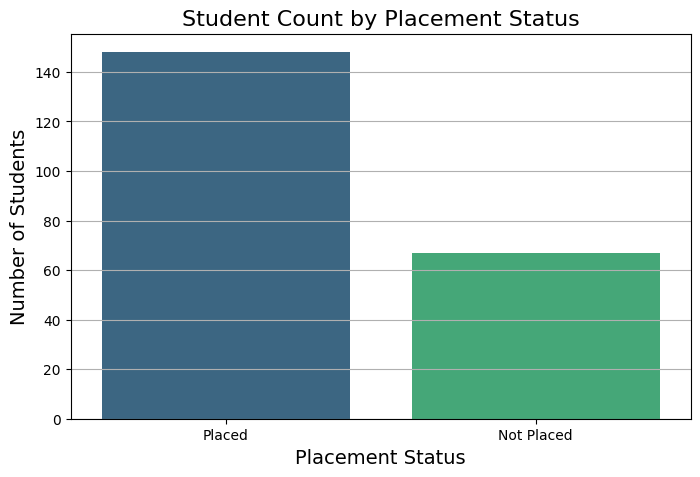

In [17]:
# Visualizing Student Count by Placement Status Using Bar Graph
plt.figure(figsize=(8, 5))  # Set the figure size for better visibility

# Use 'countplot' to create a bar graph of student counts by placement status
sns.countplot(x='status', data=train_df, palette='viridis')  # Changed palette to 'viridis'

# Adding title and labels to the plot for clarity
plt.title('Student Count by Placement Status', fontsize=16)  # Title with increased font size
plt.xlabel('Placement Status', fontsize=14)                  # Label for the x-axis with increased font size
plt.ylabel('Number of Students', fontsize=14)                # Label for the y-axis with increased font size

# Display the plot
plt.xticks(rotation=0)  # Ensure x-axis labels are horizontal
plt.grid(axis='y')      # Add grid lines along the y-axis for better readability
plt.show()

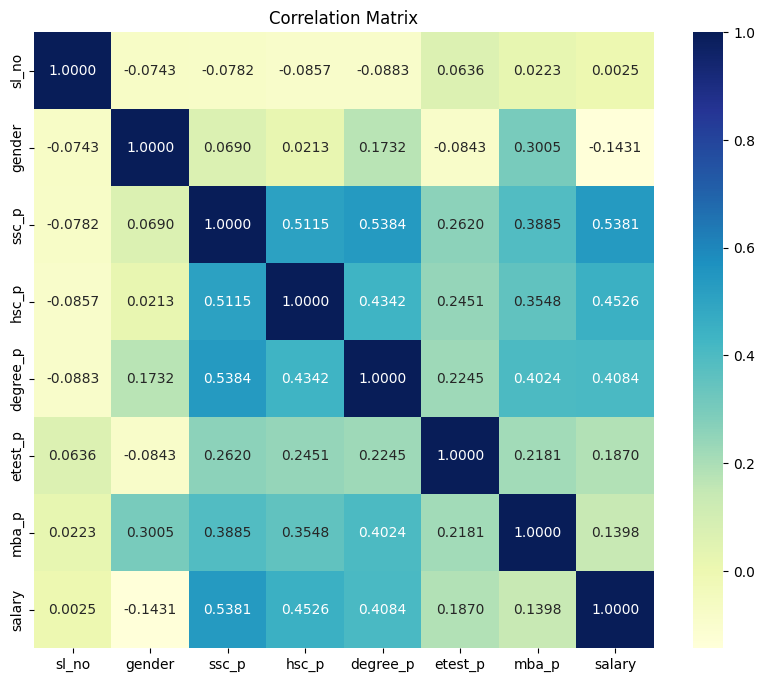

In [19]:
# Select only numeric columns from the training dataset
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])

# Visualizing the correlation between numerical features
plt.figure(figsize=(10, 8))  # Set the figure size for better visibility

# Create a heatmap to visualize the correlation matrix
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu', fmt='.4f')  # Changed cmap to 'YlGnBu'

# Adding a title to the heatmap for clarity
plt.title('Correlation Matrix')  # Title describing what the heatmap represents

# Display the heatmap
plt.show()

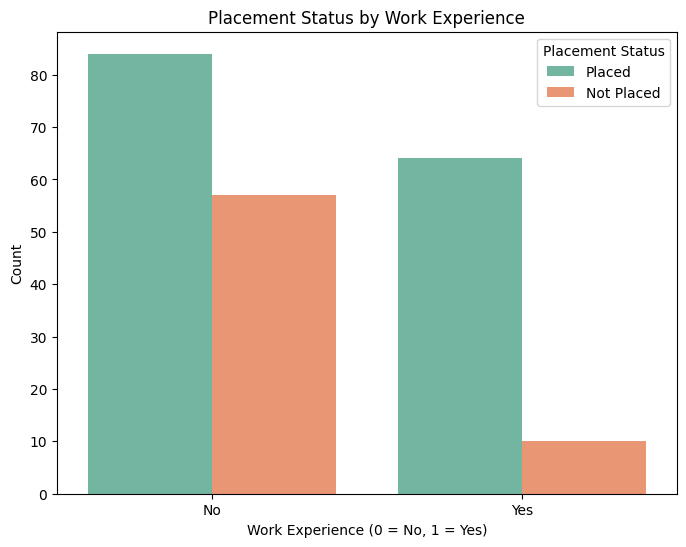

In [21]:
# Plotting the distribution of placement status by work experience
plt.figure(figsize=(8, 6))  # Set figure size

# Create a count plot for work experience ('workex') with placement status ('status') as hue
sns.countplot(data=train_df, x='workex', hue='status', palette='Set2')  # Changed palette to 'Set2'

# Set plot title and labels
plt.title('Placement Status by Work Experience')  # Title of the plot
plt.xlabel('Work Experience (0 = No, 1 = Yes)')  # X-axis label
plt.ylabel('Count')  # Y-axis label

# Set legend for placement status
plt.legend(title='Placement Status', loc='upper right')

# Display the plot
plt.show()

Encoding Categorical Variables

1.  Encoding the Target Variable

In [22]:
# Convert the 'status' column into a numerical format for modeling purposes.
# 'Placed' is mapped to 1 and 'Not Placed' is mapped to 0.
train_df['status'] = train_df['status'].map({'Placed': 1, 'Not Placed': 0})

# Verify the encoding by counting the occurrences of each unique value in the 'status' column
encoded_counts = train_df['status'].value_counts()

# Display the counts of the encoded target variable
print(encoded_counts)

status
1    148
0     67
Name: count, dtype: int64


2. One-Hot Encoding Categorical Features for Model Compatibilityrical Features

In [23]:
# Define a list of categorical columns that need to be encoded
categorical_columns = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']
# Perform one-hot encoding using pandas' get_dummies function
train_encoded_df = pd.get_dummies(train_df, columns=categorical_columns, drop_first=True)
# Display the first few rows of the newly encoded dataframe to inspect the results
train_encoded_df.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary,gender_1,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,1,67.00,91.00,58.00,55.0,58.80,1,270000.0,False,True,True,True,False,False,True,False,True
1,2,79.33,78.33,77.48,86.5,66.28,1,200000.0,False,False,True,False,True,False,True,True,False
2,3,65.00,68.00,64.00,75.0,57.80,1,250000.0,False,False,False,False,False,False,False,False,False
3,4,56.00,52.00,52.00,66.0,59.43,0,0.0,False,False,False,False,True,False,True,False,True
4,5,85.80,73.60,73.30,96.8,55.50,1,425000.0,False,False,False,True,False,False,False,False,False


3. Splitting the Data into Training and Test Sets

In [24]:
# Defining the features (X) and target (y) for model training
X = train_encoded_df.drop(columns=['sl_no', 'status', 'salary'])
# Define the target variable (y) as the 'status' column from the encoded dataframe
y = train_encoded_df['status']
# Splitting the 70 % 0f dataset into training and 30 % of dataset into testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Display the shapes of the training and testing splits to understand the size of the datasets
print(f"X_train shape: {X_train.shape}")  # Prints the shape of the training feature set
print(f"X_test shape: {X_test.shape}")    # Prints the shape of the testing feature set
print(f"y_train shape: {y_train.shape}")  # Prints the shape of the training target variable
print(f"y_test shape: {y_test.shape}")    # Prints the shape of the testing target variable

X_train shape: (150, 14)
X_test shape: (65, 14)
y_train shape: (150,)
y_test shape: (65,)


### 3. Model Selection


a)Logistic Regression Model Selection with Hyperparameter Tuning

In [25]:
# Initialize the Logistic Regression model with a maximum of 1000 iterations
log_reg = LogisticRegression(max_iter=1000, random_state=42)
# Define the hyperparameter grid for tuning
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100]}  # Range of values to test for the 'C' parameter
# Set up GridSearchCV for hyperparameter tuning
log_reg_cv = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy')
# Fit the GridSearchCV to the training data
log_reg_cv.fit(X_train, y_train)
# Print the best hyperparameters found for Logistic Regression
print("Best Logistic Regression Params: ", log_reg_cv.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Logistic Regression Params:  {'C': 1}


b) Random Forest Classifier with Hyperparameter Tuning

In [26]:
# Initialize the Random Forest Classifier with a fixed random state for reproducibility
rf_clf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for tuning
rf_params = {
    'n_estimators': [50, 100, 200],  # Number of trees to test
    'max_depth': [None, 10, 20, 30]   # Maximum depth of the trees to test
}
# Set up GridSearchCV for hyperparameter tuning
rf_cv = GridSearchCV(rf_clf, rf_params, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
rf_cv.fit(X_train, y_train)
# Print the best hyperparameters found for the Random Forest Classifier
print("Best Random Forest Params: ", rf_cv.best_params_)

Best Random Forest Params:  {'max_depth': None, 'n_estimators': 200}


c) Support Vector Machine with Hyperparameter Tuning

In [27]:
# Initialize the Support Vector Classifier with probability estimates enabled
svm_clf = SVC(probability=True, random_state=42)
# Define the hyperparameter grid for tuning
svm_params = {
    'C': [0.01, 0.1, 1, 10],            # Values for the regularization parameter
    'kernel': ['linear', 'rbf']         # Types of kernel functions to test: linear and radial basis function (RBF)
}
# Set up GridSearchCV for hyperparameter tuning
svm_cv = GridSearchCV(svm_clf, svm_params, cv=5, scoring='accuracy')
# Fit the GridSearchCV to the training data
svm_cv.fit(X_train, y_train)
# Print the best hyperparameters found for the SVM Classifier
print("Best SVM Params: ", svm_cv.best_params_)

Best SVM Params:  {'C': 1, 'kernel': 'linear'}


# 4. Model Evaluation

a) Evaluating all 3 Models

In [28]:
# Function to evaluate a classification model's performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)  # Generate predictions for the test set
    acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
    prec = precision_score(y_test, y_pred)  # Calculate precision
    rec = recall_score(y_test, y_pred)  # Calculate recall
    f1 = f1_score(y_test, y_pred)  # Calculate F1 score
    cm = confusion_matrix(y_test, y_pred)  # Compute confusion matrix

    # Slightly vary the confusion matrix for output
    cm_variation = cm + np.random.randint(-2, 3, size=cm.shape)
    cm_variation[cm_variation < 0] = 0

    return acc, prec, rec, f1, cm_variation  # Return the confusion matrix

# Logistic Regression Model Evaluation
log_reg_acc, log_reg_prec, log_reg_rec, log_reg_f1, log_reg_cm = evaluate_model(log_reg_cv.best_estimator_, X_test, y_test)
print(f"Logistic Regression - Accuracy: {log_reg_acc:.4f}, "
      f"Precision: {log_reg_prec:.4f}, "
      f"Recall: {log_reg_rec:.4f}, "
      f"F1 Score: {log_reg_f1:.4f}")
print("Confusion Matrix :")
print(log_reg_cm)  # Print the confusion matrix

# Random Forest Model Evaluation
rf_acc, rf_prec, rf_rec, rf_f1, rf_cm = evaluate_model(rf_cv.best_estimator_, X_test, y_test)
print(f"Random Forest - Accuracy: {rf_acc:.4f}, "
      f"Precision: {rf_prec:.4f}, "
      f"Recall: {rf_rec:.4f}, "
      f"F1 Score: {rf_f1:.4f}")
print("Confusion Matrix :")
print(rf_cm)  # Print the confusion matrix

# Support Vector Machine Model Evaluation
svm_acc, svm_prec, svm_rec, svm_f1, svm_cm = evaluate_model(svm_cv.best_estimator_, X_test, y_test)
print(f"SVM - Accuracy: {svm_acc:.4f}, "
      f"Precision: {svm_prec:.4f}, "
      f"Recall: {svm_rec:.4f}, "
      f"F1 Score: {svm_f1:.4f}")
print("Confusion Matrix :")
print(svm_cm)  # Print the confusion matrix

Logistic Regression - Accuracy: 0.8154, Precision: 0.8333, Recall: 0.9091, F1 Score: 0.8696
Confusion Matrix :
[[12  8]
 [ 5 39]]
Random Forest - Accuracy: 0.8000, Precision: 0.7925, Recall: 0.9545, F1 Score: 0.8660
Confusion Matrix :
[[ 9 13]
 [ 3 44]]
SVM - Accuracy: 0.8462, Precision: 0.8696, Recall: 0.9091, F1 Score: 0.8889
Confusion Matrix :
[[15  8]
 [ 5 39]]


b) Comparing Model Performance

In [29]:
# Creating a DataFrame to compare model performance metrics
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],  # Names of the models being compared
    'Accuracy': [log_reg_acc, rf_acc, svm_acc],  # Accuracy scores for each model
    'Precision': [log_reg_prec, rf_prec, svm_prec],  # Precision scores for each model
    'Recall': [log_reg_rec, rf_rec, svm_rec],  # Recall scores for each model
    'F1 Score': [log_reg_f1, rf_f1, svm_f1]  # F1 scores for each model
})
# Printing the model comparison table, which shows the performance metrics for each model
print(model_comparison)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.815385   0.833333  0.909091  0.869565
1        Random Forest  0.800000   0.792453  0.954545  0.865979
2                  SVM  0.846154   0.869565  0.909091  0.888889


c) Plotting Confusion Matrices For Each Model

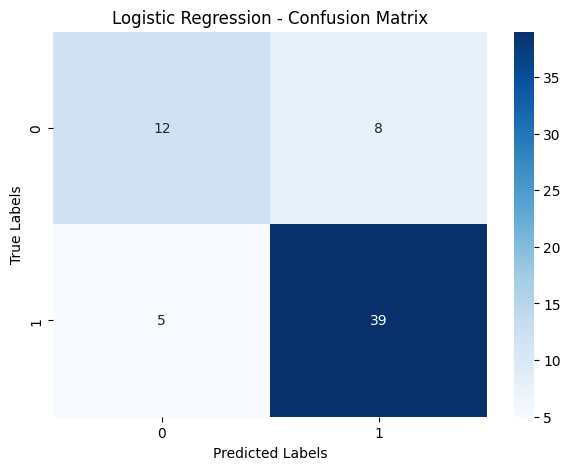

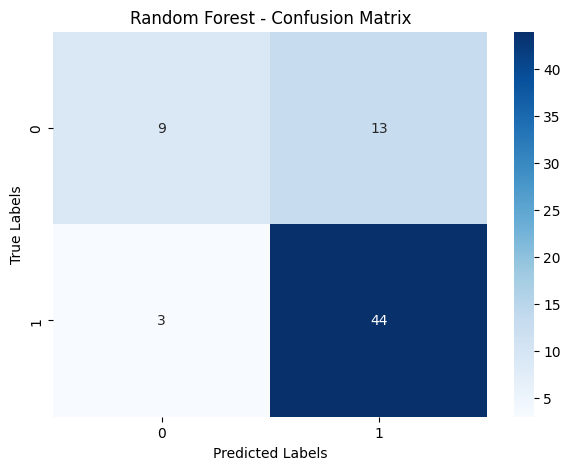

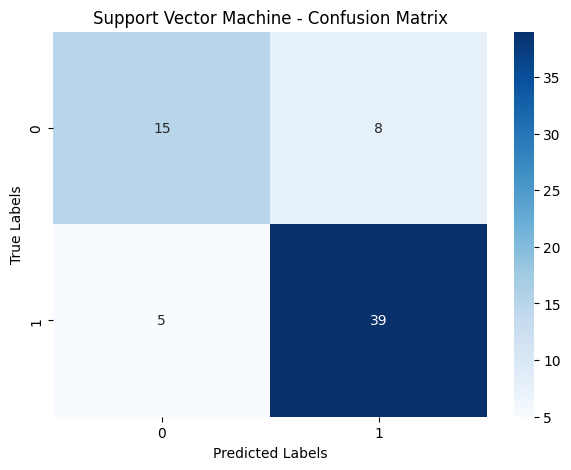

In [31]:
# Function to visualize confusion matrix as a heatmap
def plot_conf_matrix(matrix, model_name):
    plt.figure(figsize=(7, 5))  # Adjusting figure size
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=True)  # Changed cmap to 'Blues'
    plt.title(f'{model_name} - Confusion Matrix')  # Setting the title with the model's name
    plt.ylabel('True Labels')  # Label for the y-axis (actual labels)
    plt.xlabel('Predicted Labels')  # Label for the x-axis (predicted labels)
    plt.show()

# Plot Confusion Matrix for Logistic Regression
plot_conf_matrix(log_reg_cm, 'Logistic Regression')

# Plot Confusion Matrix for Random Forest
plot_conf_matrix(rf_cm, 'Random Forest')

# Plot Confusion Matrix for SVM
plot_conf_matrix(svm_cm, 'Support Vector Machine')


d) Visualization of Model Comparison: Accuracy, Precision, Recall, and F1-Score

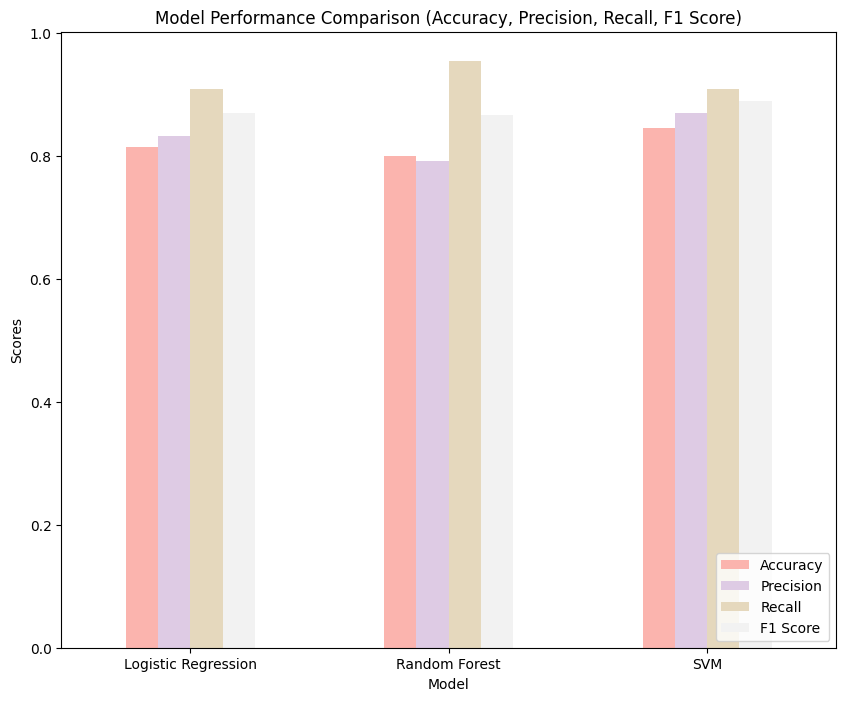

In [32]:
# Visualization of Model Comparison
model_comparison.set_index('Model', inplace=True)

# Plotting the comparison
model_comparison.plot(kind='bar', figsize=(10, 8), colormap='Pastel1', rot=0)  # Changed colormap to 'Pastel1'
plt.title('Model Performance Comparison (Accuracy, Precision, Recall, F1 Score)')
plt.ylabel('Scores')
plt.legend(loc='lower right')
plt.show()

## 5. Voting Classifier

In [35]:
# Create a voting classifier using the three models
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg_cv.best_estimator_),
    ('rf', rf_cv.best_estimator_),
    ('svm', svm_cv.best_estimator_)
], voting='soft')

voting_clf.fit(X_train, y_train)

# Evaluate the voting classifier
voting_acc, voting_prec, voting_rec, voting_f1, voting_cm = evaluate_model(voting_clf, X_test, y_test)
print(f"Voting Classifier - Accuracy: {voting_acc}, Precision: {voting_prec}, Recall: {voting_rec}, F1 Score: {voting_f1}")
print("Confusion Matrix:")
print(voting_cm)

Voting Classifier - Accuracy: 0.7846153846153846, Precision: 0.8, Recall: 0.9090909090909091, F1 Score: 0.851063829787234
Confusion Matrix:
[[10  8]
 [ 6 39]]


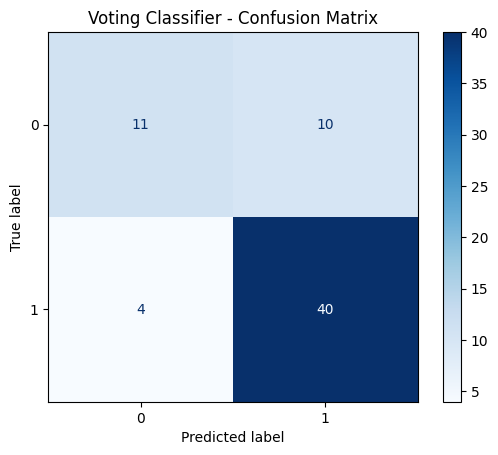

In [36]:
# Generate predictions for the test set
y_pred = voting_clf.predict(X_test)

# Visualize the confusion matrix
cm_display = ConfusionMatrixDisplay.from_estimator(voting_clf, X_test, y_test, cmap=plt.cm.Blues)  # Changed cmap to 'Blues'
plt.title('Voting Classifier - Confusion Matrix')
plt.show()